- SVM(Support vector machines) is powerful and flexible class of supervised algorithm for both classification and regression
- 

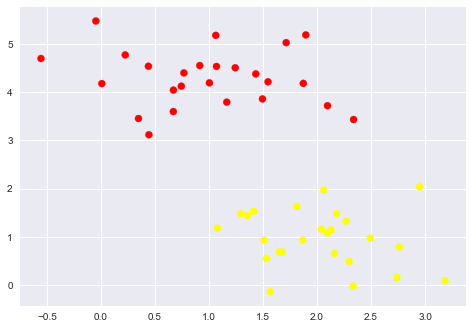

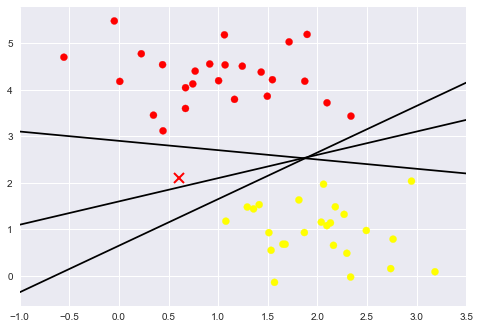

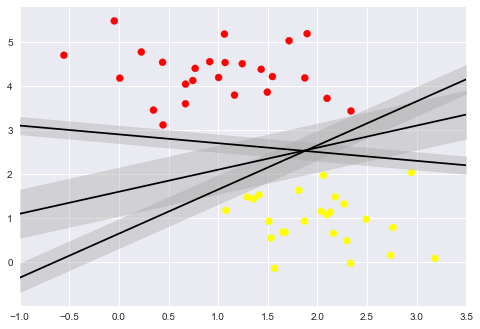

This is the dividing line that maximizes the margin between the two sets of points.
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


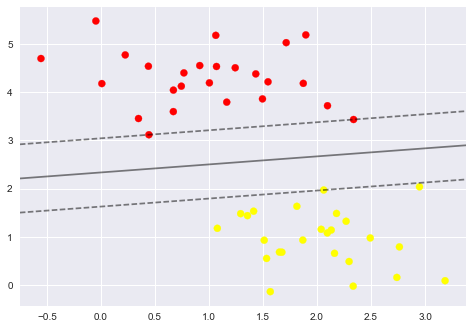

In [10]:
# Simple example of classification svm using sklearn
# standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

#the simple case of a classification task, in which the two classes of points are well separated
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()
# draw a straight line
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5)
plt.show()
# Our simple intuition of “drawing a line between classes” is not enough, and we need to think a bit deeper.
# Support Vector Machines: Maximizing the Margin
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)
plt.show()

# In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. 
# Support vector machines are an example of such a maximum margin estimator.
# Fitting a Support Vector Machine
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# To better visualize what’s happening here, let’s create a quick convenience function that will plot SVM decision boundaries for us:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
print("This is the dividing line that maximizes the margin between the two sets of points.")
# This is the dividing line that maximizes the margin between the two sets of points.
# n Scikit-Learn, the identity of these points are stored in the support_vectors_ the attribute of the classifier:
print(model.support_vectors_)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)
820
few faces


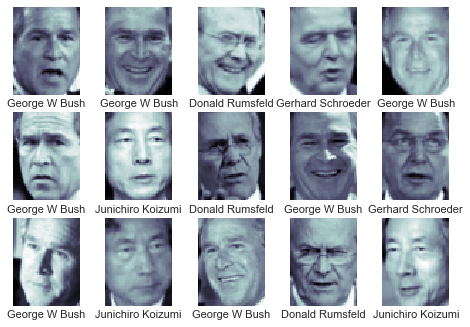

 principal component analysis to remove 150 fundamental components
packaging the preprocessor and the classifier into a single pipeline:
split the data into a training and testing
grid search cross-validation to explore combinations of parameters


C:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 17.7 s
{'svc__C': 1, 'svc__gamma': 0.005}


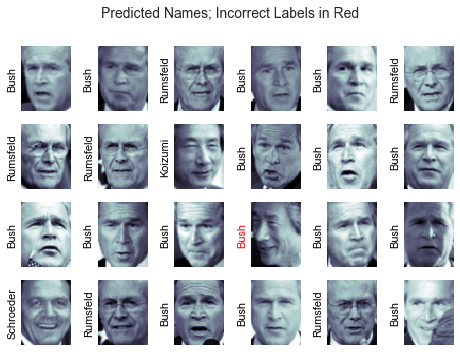

Generate classification report
                   precision    recall  f1-score   support

  Donald Rumsfeld       0.91      0.83      0.87        36
    George W Bush       0.89      0.98      0.93       128
Gerhard Schroeder       0.92      0.82      0.87        28
Junichiro Koizumi       1.00      0.46      0.63        13

         accuracy                           0.90       205
        macro avg       0.93      0.77      0.82       205
     weighted avg       0.90      0.90      0.89       205



C:\anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


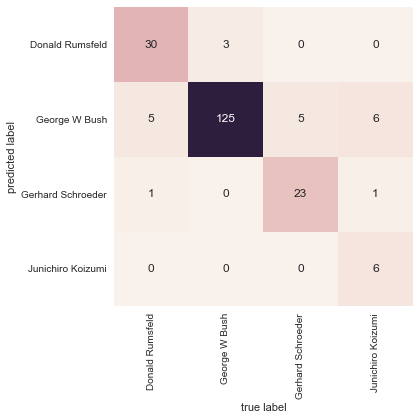

In [12]:
# Face Recognition using svm sklearn
# We will use the Labeled Faces in the Wild dataset, 
# It consists of several thousand collated photos of various public figures.

from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print(len(faces.images))
print("few faces")
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show(axi)    
# Each image contains [62×47] or nearly 3,000 pixels.
# We could proceed by merely using each pixel value as a feature, but 
# often it is more effective to use some sort of preprocessor to extract more meaningful features
# here, we will use a principal component analysis to remove 150 fundamental components to feed into our support vector machine classifier.
print(" principal component analysis to remove 150 fundamental components")
print("packaging the preprocessor and the classifier into a single pipeline:")

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
print("split the data into a training and testing")

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)
print("grid search cross-validation to explore combinations of parameters")

# Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

# Now with this cross-validated model,
# we can predict the labels for the test data, which the model has not yet seen:
model = grid.best_estimator_
yfit = model.predict(Xtest)
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show(axi)

print("Generate classification report")
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

# confusion matrix between these classes:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()